In [1]:
# import dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import requests
import json
import csv
import os
import random

In [2]:
# creates path for csv datafile
file1= "phs_2019_stage_1.csv"
file2= "phs_2019_stage_2.csv"
file3= "phs_2019_stage_3.csv"
file4= "phs_2019_stage_4.csv"  
file5= "phs_2019_playoffs.csv"

# create paths for api data
url1 = "https://api.overwatchleague.com/players"
url2 = "https://api.overwatchleague.com/stats/players"


In [3]:
# reads the csv and transforms it into a dataframe
overwatch_df_1 = pd.read_csv(file1)
overwatch_df_2 = pd.read_csv(file2)
overwatch_df_3 = pd.read_csv(file3)
overwatch_df_4 = pd.read_csv(file4)
overwatch_df_5 = pd.read_csv(file5)

In [4]:
# read api data 
response1 = requests.get(url1)
response = requests.get(url2)

In [5]:
# combining all csv data into one dataframe 
complete_overwatch_df = overwatch_df_1.append([overwatch_df_2, overwatch_df_3, overwatch_df_4, overwatch_df_5])

In [6]:
complete_overwatch_df

,pelstart_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount,start_time
0,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.193400,NaN
1,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Assists,All Heroes,13.000000,NaN
2,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.623574,NaN
3,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Barrier Damage Done,All Heroes,5674.344475,NaN
4,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Damage - Quick Melee,All Heroes,78.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103967,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Ultimates Used,Ana,6.000000,9/29/2019 20:47
103968,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Unscoped Accuracy,Ana,0.528777,9/29/2019 20:47
103969,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Unscoped Hits,Ana,147.000000,9/29/2019 20:47
103970,NaN,30157,Overwatch League 2019 Post-Season,PAYLOAD,Watchpoint: Gibraltar,Twilight,Vancouver Titans,Unscoped Shots,Ana,278.000000,9/29/2019 20:47


In [7]:
# drops the columns below
dropped_complete_overwatch_df = complete_overwatch_df.drop(columns=["pelstart_time", "map_name",  "map_type", "start_time"])

In [8]:
# Creates a list of the rows we would liek to keep
stats = ["All Damage Done", "Assists", "Average Time Alive", "Critical Hit Accuracy", "Damage - Weapon Primary",  "Damage - Weapon Secondary", "Damage Blocked", "Damage Done", "Damage Taken", "Deaths", "Eliminations", "Healing Done", "Multikills", "Primary Fire Accuracy", "Primary Fire Hits", "Secondary Fire Accuracy", "Secondary Fire Hits", "Time Alive", "Weapon Accuracy", "Ultimates Earned - Fractional"
]

In [9]:
# Drops the row names that aren't included in the the list
stats_df = dropped_complete_overwatch_df[dropped_complete_overwatch_df['stat_name'].isin(stats)]

In [10]:
# Displays new dataframe
stats_df

,match_id,stage,player,team,stat_name,hero,stat_amount
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.193400
1,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Assists,All Heroes,13.000000
2,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.623574
5,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Done,All Heroes,9039.330256
6,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Taken,All Heroes,4192.611340
...,...,...,...,...,...,...,...
103939,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Healing Done,Ana,10009.825090
103942,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Multikills,Ana,2.000000
103961,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Time Alive,Ana,765.860023
103966,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Ultimates Earned - Fractional,Ana,6.755780


In [11]:
stats_df["stat_name"].unique()

array(['All Damage Done', 'Assists', 'Average Time Alive', 'Damage Done',
       'Damage Taken', 'Deaths', 'Eliminations', 'Healing Done',
       'Multikills', 'Time Alive', 'Ultimates Earned - Fractional',
       'Weapon Accuracy', 'Critical Hit Accuracy',
       'Damage - Weapon Primary', 'Secondary Fire Accuracy',
       'Damage Blocked', 'Damage - Weapon Secondary',
       'Primary Fire Accuracy', 'Primary Fire Hits',
       'Secondary Fire Hits'], dtype=object)

In [12]:
# Rounds the stat_amount to four decimal places
rounded_stats_df = stats_df.round({"stat_amount" : 4})

In [13]:
# displays new dataframe 
rounded_stats_df

,match_id,stage,player,team,stat_name,hero,stat_amount
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.1934
1,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Assists,All Heroes,13.0000
2,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.6236
5,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Done,All Heroes,9039.3303
6,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Taken,All Heroes,4192.6113
...,...,...,...,...,...,...,...
103939,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Healing Done,Ana,10009.8251
103942,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Multikills,Ana,2.0000
103961,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Time Alive,Ana,765.8600
103966,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Ultimates Earned - Fractional,Ana,6.7558


In [14]:
player_count_df = rounded_stats_df["stage"].nunique()
player_count_df 

8

In [15]:
Hero_name = (['Zenyatta', 'McCree', 'Zarya', 'D.Va',
       'Wrecking Ball', 'Orisa', 'Reinhardt', 'Winston', 'Lúcio',
       'Brigitte', 'Hanzo', 'Ana', 'Widowmaker', 'Doomfist', 'Tracer',
       'Soldier: 76', 'Sombra', 'Ashe', 'Mercy', 'Genji', 'Pharah',
       'Moira', 'Torbjörn', 'Reaper', 'Mei', 'Bastion', 'Symmetra',
       'Roadhog', 'Junkrat', 'Baptiste', 'Sigma'])
Role =  (['Support', 'Damage', 'Tank', 'Tank',
       'Tank', 'Tank', 'Tank', 'Tank', 'Support',
       'Support', 'Damage', 'Support', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Support', 'Damage', 'Damage',
       'Support', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Tank', 'Damage', "Support", 'Tank'])

hero_role = pd.DataFrame({
    "hero" : Hero_name,
    "role" : Role
})
hero_role

,hero,role
0,Zenyatta,Support
1,McCree,Damage
2,Zarya,Tank
3,D.Va,Tank
4,Wrecking Ball,Tank
5,Orisa,Tank
6,Reinhardt,Tank
7,Winston,Tank
8,Lúcio,Support
9,Brigitte,Support


In [16]:

# Merge the hero class with the main dataframe
hero_class_df = (rounded_stats_df.merge(hero_role,on="hero",how="left"))

# Drop Nan values (All Heroes) from "hero" columns 
hero_class_df = hero_class_df[hero_class_df['role'].notna()]
print(hero_class_df.head(30))

    match_id                     stage    player             team  \
12     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
13     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
14     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
15     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
16     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
17     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
18     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
19     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
20     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
21     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
22     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
23     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
24     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
25     21211  Overwatch League Sta

In [17]:
hero_picks = hero_class_df.drop_duplicates(subset=['match_id', 'hero'], keep='first')

In [18]:
hero_picks

,match_id,stage,player,team,stat_name,hero,stat_amount,role
12,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,Zenyatta,14845.1934,Support
38,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,McCree,1439.9678,Damage
50,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,Zarya,18040.3536,Tank
78,21211,Overwatch League Stage 1,Fury,London Spitfire,All Damage Done,D.Va,13316.4290,Tank
91,21211,Overwatch League Stage 1,Fury,London Spitfire,Average Time Alive,Wrecking Ball,6.0960,Tank
...,...,...,...,...,...,...,...,...
513912,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Ana,3856.8818,Support
513923,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Baptiste,4603.0941,Support
513977,30157,Overwatch League 2019 Post-Season,moth,San Francisco Shock,Average Time Alive,Mercy,73.8903,Support
514037,30157,Overwatch League 2019 Post-Season,Haksal,Vancouver Titans,Average Time Alive,Genji,2.5960,Damage


In [19]:
df = hero_class_df["match_id"].unique()
len(df)

319

In [20]:
hero_df = pd.DataFrame(hero_picks['hero'].value_counts())
hero_df = hero_df.rename(columns={"hero" : "Games Used"})

In [21]:
hero_df = hero_df.reset_index()

In [22]:
hero_df["Pick Rate"] = hero_df["Games Used"]/len(df)*100
hero_df

,index,Games Used,Pick Rate
0,Wrecking Ball,319,100.000000
1,Lúcio,319,100.000000
2,D.Va,312,97.805643
3,Ana,307,96.238245
4,Tracer,304,95.297806
5,Zenyatta,302,94.670846
6,Sombra,297,93.103448
7,Widowmaker,295,92.476489
8,Winston,289,90.595611
9,Reinhardt,288,90.282132


In [23]:
hero_df = hero_df.rename(columns={"index" : "hero"})
hero_df

,hero,Games Used,Pick Rate
0,Wrecking Ball,319,100.000000
1,Lúcio,319,100.000000
2,D.Va,312,97.805643
3,Ana,307,96.238245
4,Tracer,304,95.297806
5,Zenyatta,302,94.670846
6,Sombra,297,93.103448
7,Widowmaker,295,92.476489
8,Winston,289,90.595611
9,Reinhardt,288,90.282132


In [24]:
hero_pickrate = hero_role.merge(hero_df, how="outer", on="hero")
hero_pickrate

,hero,role,Games Used,Pick Rate
0,Zenyatta,Support,302,94.670846
1,McCree,Damage,168,52.664577
2,Zarya,Tank,252,78.996865
3,D.Va,Tank,312,97.805643
4,Wrecking Ball,Tank,319,100.000000
5,Orisa,Tank,257,80.564263
6,Reinhardt,Tank,288,90.282132
7,Winston,Tank,289,90.595611
8,Lúcio,Support,319,100.000000
9,Brigitte,Support,268,84.012539


In [25]:
hero_pickrate = hero_pickrate.sort_values(by=['role', 'Pick Rate'], ascending=False)
hero_pickrate

,hero,role,Games Used,Pick Rate
4,Wrecking Ball,Tank,319,100.000000
3,D.Va,Tank,312,97.805643
7,Winston,Tank,289,90.595611
6,Reinhardt,Tank,288,90.282132
5,Orisa,Tank,257,80.564263
2,Zarya,Tank,252,78.996865
27,Roadhog,Tank,227,71.159875
30,Sigma,Tank,18,5.642633
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245


In [26]:
#transform player data api data into dataframe
data1 = response.json()
data1.keys()

dict_keys(['data'])

In [27]:
df1 = pd.DataFrame(data1["data"])
df1.head(100)

,playerId,teamId,role,name,team,eliminations_avg_per_10m,deaths_avg_per_10m,hero_damage_avg_per_10m,healing_avg_per_10m,ultimates_earned_avg_per_10m,final_blows_avg_per_10m,time_played_total
0,5863,7697,support,AimGod,WAS,13.414336,4.687159,6721.795662,9486.871283,4.724139,3.651732,64900.715138
1,8812,7692,tank,ameng,CDH,16.470544,6.202665,7051.640852,0.724798,4.511644,5.046006,88703.810417
2,4841,4403,support,Anamo,NYE,14.165021,2.745207,3948.127250,6563.244540,3.567532,1.898150,97041.863429
3,5715,7693,offense,Architect,HZS,18.181756,4.555888,7825.862117,3806.894747,4.639483,8.087747,28710.098079
4,4652,7697,support,ArK,WAS,7.870130,2.641469,2482.555936,6825.268613,3.518943,1.320735,66326.727702
...,...,...,...,...,...,...,...,...,...,...,...,...
90,4104,4409,support,tobi,SEO,12.527639,3.561285,3821.983777,6536.903535,3.460255,2.083730,47510.945922
91,8729,4404,support,Twilight,SFS,16.044986,4.139107,7122.262343,9320.446421,5.048997,4.156948,100891.334471
92,8688,4404,support,Viol2t,SFS,17.185764,4.195764,7637.591409,10409.200261,5.300486,4.440653,110254.045210
93,5809,4408,tank,Void,SHD,19.343389,3.178936,6457.220391,250.965632,2.048810,5.555847,82291.682828


In [28]:
#tranform player stats api into data frame 
data = response1.json()
data.keys()

dict_keys(['content', 'totalElements', 'last', 'totalPages', 'numberOfElements', 'sort', 'first', 'size', 'number'])

In [29]:
df = pd.DataFrame(data["content"])
df.head(100)

,id,availableLanguages,name,homeLocation,accounts,game,attributes,attributesVersion,familyName,givenName,nationality,headshot,teams,user,@etag,type,handle
0,9279,[en],ILLICIT,Suncheon,"[{'id': 13648, 'competitorId': 9279, 'value': ...",OVERWATCH,"{'heroes': ['genji'], 'player_number': 21, 'pr...",1.0.2,Park,Je Min,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4409, 'availableLanguages': [...",{'id': 920},c856ddbc,PLAYER,NaN
1,10011,[en],FunnyAstro,"Reading, England","[{'id': 14191, 'competitorId': 10011, 'value':...",OVERWATCH,"{'heroes': ['lucio', 'mercy'], 'player_number'...",1.0.2,Hathaway,Daniel,GB,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4524, 'availableLanguages': [...",{'id': 989},8f7f9011,PLAYER,NaN
2,8748,"[en, zh-cn]",JJANU,Seoul,"[{'id': 12876, 'competitorId': 8748, 'value': ...",OVERWATCH,"{'player_number': 14, 'preferred_slot': '3', '...",1.0.2,Choi,HyunWoo,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7697, 'availableLanguages': [...",{'id': 1844},78b69123,PLAYER,NaN
3,9591,[en],frd,"Saint Louis, MO","[{'id': 13922, 'competitorId': 9591, 'value': ...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.2,Goebel,Nathan,US,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7698, 'availableLanguages': [...",{'id': 1717},14194eb9,PLAYER,NaN
4,5831,"[en, ko, zh-cn]",Choihyobin,Seoul,"[{'id': 7653, 'competitorId': 5831, 'value': '...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.6,Choi,Hyobin,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4404, 'availableLanguages': [...",NaN,baa8ef49,PLAYER,choihyobin.6059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8754,"[en, zh-cn]",ivy,Daegu,"[{'id': 13000, 'competitorId': 8754, 'value': ...",OVERWATCH,"{'heroes': ['hanzo'], 'player_number': 2, 'pre...",1.0.2,Lee,SeungHyun,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4524, 'availableLanguages': [...",{'id': 202},51d20656,PLAYER,NaN
96,5210,"[en, ko, zh-cn]",Geguri,Daejeon,"[{'id': 1903, 'competitorId': 5210, 'value': '...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.0,Kim,Se yeon,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4408, 'availableLanguages': [...",{'id': 2155},5e84169a,PLAYER,geguri.9297
97,8717,"[en, zh-cn]",iDK,Seoul,"[{'id': 12975, 'competitorId': 8717, 'value': ...",OVERWATCH,"{'player_number': 37, 'preferred_slot': '4', '...",1.0.4,Park,Ho jin,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7693, 'availableLanguages': [...",{'id': 783},7c677bff,PLAYER,NaN
98,8222,"[en, zh-cn]",rOar,Incheon,"[{'id': 12288, 'competitorId': 8222, 'value': ...",OVERWATCH,"{'heroes': ['orisa', 'reinhardt', 'winston'], ...",1.0.0,Gye,Chang-hoon,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7697, 'availableLanguages': [...",{'id': 390},3182e9b1,PLAYER,NaN


In [30]:
df = df.drop(columns=["availableLanguages", "accounts",  "game", "attributes", "attributesVersion", "headshot", "teams", "user", "@etag", "type"])
df

,id,name,homeLocation,familyName,givenName,nationality,handle
0,9279,ILLICIT,Suncheon,Park,Je Min,KR,NaN
1,10011,FunnyAstro,"Reading, England",Hathaway,Daniel,GB,NaN
2,8748,JJANU,Seoul,Choi,HyunWoo,KR,NaN
3,9591,frd,"Saint Louis, MO",Goebel,Nathan,US,NaN
4,5831,Choihyobin,Seoul,Choi,Hyobin,KR,choihyobin.6059
...,...,...,...,...,...,...,...
139,12060,Stand1,Seoul,Seo,Ji Won,KR,NaN
140,12032,Ttuba,Changwon,Lee,Hoseong,KR,NaN
141,13731,ta1yo,North Carolina,Henderson,Sean Taiyo,US,NaN
142,12096,ANS,Seoul,Lee,Seonchang,KR,NaN


In [139]:
nationality_count = pd.DataFrame(df['nationality'].value_counts())
nationality_count = nationality_count.sort_values(by='nationality', ascending=False)
# turn index into a column
nationality_count.reset_index(level=0, inplace=True)
#print(nationality_count)

df2 = nationality_count[:5].copy()

# Combine the nationalities below 3% into a new row
new_row = pd.DataFrame(data = {
    'index' : ['others'],
    'nationality' : [nationality_count['nationality'][5:].sum()]
})

# Drop index to concat
new_row.reset_index()
df2.reset_index()
#print(f'{new_row}\n{df2}')

lower_nat = nationality_count.loc[nationality_count['nationality'] <= 4]
lower_row = lower_nat['nationality'].sum() 
lower_row

nationality_count = pd.concat([df2, new_row])
nationality_count = nationality_count.set_index('index')
nationality_count


,nationality
index,
KR,87
US,16
CN,14
GB,5
FR,5
others,17


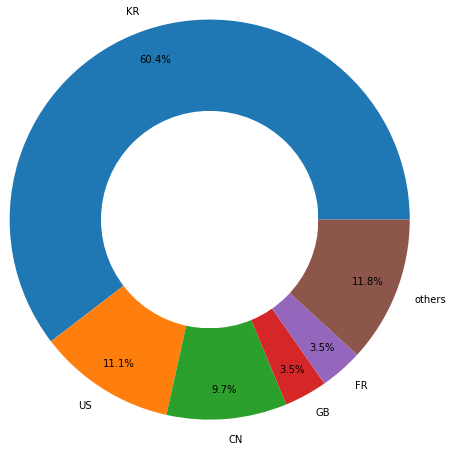

In [140]:
#Create pie chart of Player Nationality
labels = nationality_count.index.tolist()
sizes = nationality_count['nationality']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85, radius=2.3)

#draw circle
centre_circle = plt.Circle((0,0),1.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#plt.tight_layout()

plt.show()

In [33]:
#Create bar graph of best players vs average players 

In [34]:
support_df = hero_pickrate.loc[(hero_pickrate["role"] == "Support")]
support_df

,hero,role,Games Used,Pick Rate
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245
0,Zenyatta,Support,302,94.670846
18,Mercy,Support,282,88.401254
9,Brigitte,Support,268,84.012539
21,Moira,Support,258,80.877743
29,Baptiste,Support,209,65.517241


In [35]:
offense_df = hero_pickrate.loc[(hero_pickrate["role"] == "Damage")]
offense_df 

,hero,role,Games Used,Pick Rate
14,Tracer,Damage,304,95.297806
16,Sombra,Damage,297,93.103448
12,Widowmaker,Damage,295,92.476489
10,Hanzo,Damage,268,84.012539
20,Pharah,Damage,264,82.758621
13,Doomfist,Damage,244,76.489028
24,Mei,Damage,208,65.203762
1,McCree,Damage,168,52.664577
19,Genji,Damage,164,51.410658
25,Bastion,Damage,152,47.648903


In [36]:
tank_df = hero_pickrate.loc[(hero_pickrate["role"] == "Tank")]
tank_df 

,hero,role,Games Used,Pick Rate
4,Wrecking Ball,Tank,319,100.000000
3,D.Va,Tank,312,97.805643
7,Winston,Tank,289,90.595611
6,Reinhardt,Tank,288,90.282132
5,Orisa,Tank,257,80.564263
2,Zarya,Tank,252,78.996865
27,Roadhog,Tank,227,71.159875
30,Sigma,Tank,18,5.642633


In [37]:
labels = ['Support','Damage','Tank']

support_pick_rates = [
    int(support_df.iloc[0,3]),
    int(support_df.iloc[1,3]),
    int(support_df.iloc[2,3]),  
]

tank_pick_rates = [
    int(tank_df.iloc[0,3]),
    int(tank_df.iloc[1,3]),
    int(tank_df.iloc[2,3]),  
]

offense_pick_rates = [
    int(offense_df.iloc[0,3]),
    int(offense_df.iloc[1,3]),
    int(offense_df.iloc[2,3]),  
]

In [38]:
support_pick_rates

[100, 96, 94]

In [39]:
jj = (offense_df.iloc[0,3])
jj

95.29780564263322

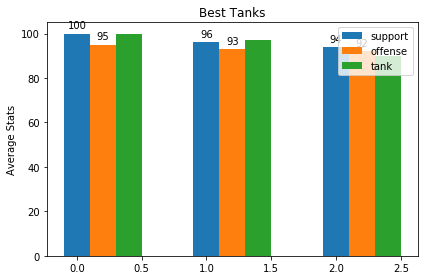

In [40]:
labels = ['Support','Damage','Tank']

#x = np.arange(len(labels))  # the label locations
width = 0.2# the width of the bars

fig, ax = plt.subplots()

x1 = np.arange(len(support_pick_rates))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

rects1 = ax.bar(x1, support_pick_rates, width, label='support')
rects2 = ax.bar(x2, offense_pick_rates, width, label='offense')
rects3= ax.bar(x3, tank_pick_rates, width, label='tank')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Stats')
ax.set_title('Best Tanks')
#x.set_xticks(x)
#x.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

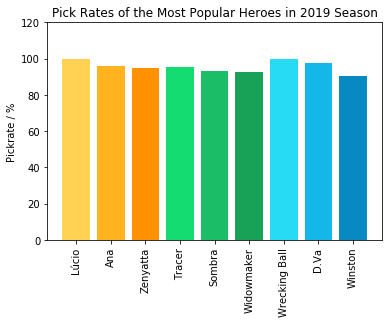

In [41]:
labelss = [
    (support_df.iloc[0,0]),
    (support_df.iloc[1,0]),
    (support_df.iloc[2,0]),
    (offense_df.iloc[0,0]),
    (offense_df.iloc[1,0]),
    (offense_df.iloc[2,0]),
    (tank_df.iloc[0,0]),
    (tank_df.iloc[1,0]),
    (tank_df.iloc[2,0]),   
]

pickrates = [
    (support_df.iloc[0,3]),
    (support_df.iloc[1,3]),
    (support_df.iloc[2,3]),
    (offense_df.iloc[0,3]),
    (offense_df.iloc[1,3]),
    (offense_df.iloc[2,3]),
    (tank_df.iloc[0,3]),
    (tank_df.iloc[1,3]),
    (tank_df.iloc[2,3]),   
]

colors_pickrates = ['#ffd254','#ffb31f','#ff9102',
                    '#14dc71','#1bbd66','#17a258',
                   '#27dbf5','#13b8e8','#0989c2']
N=9
theta = 2 * np.pi * np.random.rand(N)

x_axis = np.arange(len(labelss))
plt.xticks(x_axis, labelss, rotation=90)

plt.bar(x_axis, pickrates, align='center', color=colors_pickrates)
plt.title('Pick Rates of the Most Popular Heroes in 2019 Season')
plt.ylabel('Pickrate / %')
plt.ylim(0,(max(pickrates))+(max(pickrates)*0.2))

plt.show()


In [42]:
theta

array([1.66983548, 6.20721639, 0.95127631, 6.13418827, 3.21214042,
       3.84695089, 2.1318633 , 3.92633155, 0.60063785])

AttributeError: 'list' object has no attribute 'get_label'

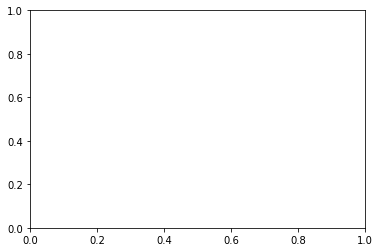

In [43]:
red_patch = mpatches.Patch(color='green', label='Tank')
blue_patch = mpatches.Patch(color='blue', label='Offense')
yellow_patch = mpatches.Patch(color='yellow', label='Support')
plt.legend(handles=([red_patch],[blue_patch],[yellow_patch]))
plt.show()

In [45]:
# Uses locator function to locates the stat_name column, specifically "All Damage Done"
all_damage_df = hero_class_df.loc[(hero_class_df["stat_name"] == "All Damage Done")]
all_damage_df

,match_id,stage,player,team,stat_name,hero,stat_amount,role
12,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,Zenyatta,14845.1934,Support
38,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,McCree,1439.9678,Damage
50,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,Zarya,18040.3536,Tank
78,21211,Overwatch League Stage 1,Fury,London Spitfire,All Damage Done,D.Va,13316.4290,Tank
106,21211,Overwatch League Stage 1,Gesture,London Spitfire,All Damage Done,Orisa,839.4922,Tank
...,...,...,...,...,...,...,...,...
514816,30157,Overwatch League 2019 Post-Season,SeoMinSoo,Vancouver Titans,All Damage Done,Reaper,18278.9708,Damage
514827,30157,Overwatch League 2019 Post-Season,SeoMinSoo,Vancouver Titans,All Damage Done,Tracer,20.8718,Damage
514843,30157,Overwatch League 2019 Post-Season,TiZi,Vancouver Titans,All Damage Done,Orisa,19891.9708,Tank
514854,30157,Overwatch League 2019 Post-Season,TiZi,Vancouver Titans,All Damage Done,Wrecking Ball,266.2694,Tank


In [46]:
# groups the above stats into an average and groups the average by team name
all_damage_df2 = all_damage_df.groupby(["team"]).mean()["stat_amount"]
all_damage_df2

team
Atlanta Reign             8844.224549
Boston Uprising           7378.813843
Chengdu Hunters           5817.772315
Dallas Fuel               7904.626737
Florida Mayhem            6842.984182
Guangzhou Charge          7285.341954
Hangzhou Spark            9477.816830
Houston Outlaws           6395.184262
London Spitfire           8087.514092
Los Angeles Gladiators    8842.679875
Los Angeles Valiant       8424.741475
New York Excelsior        8257.979682
Paris Eternal             7320.960517
Philadelphia Fusion       8240.809411
San Francisco Shock       9878.222191
Seoul Dynasty             9278.166425
Shanghai Dragons          7542.143569
Toronto Defiant           7127.093354
Vancouver Titans          9566.297400
Washington Justice        7762.859584
Name: stat_amount, dtype: float64

In [47]:
# Uses locator function to locates the stat_name column, specifically "Healing Done"
all_healing_df = hero_class_df.loc[(hero_class_df["stat_name"] == "Healing Done")]
all_healing_df

,match_id,stage,player,team,stat_name,hero,stat_amount,role
20,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Healing Done,Zenyatta,10225.9582,Support
157,21211,Overwatch League Stage 1,NUS,London Spitfire,Healing Done,Lúcio,9572.9723,Support
183,21211,Overwatch League Stage 1,Profit,London Spitfire,Healing Done,Brigitte,11823.0019,Support
215,21211,Overwatch League Stage 1,Boombox,Philadelphia Fusion,Healing Done,Zenyatta,7669.2323,Support
321,21211,Overwatch League Stage 1,eqo,Philadelphia Fusion,Healing Done,Brigitte,10813.1730,Support
...,...,...,...,...,...,...,...,...
514667,30157,Overwatch League 2019 Post-Season,moth,San Francisco Shock,Healing Done,Baptiste,9825.8503,Support
514681,30157,Overwatch League 2019 Post-Season,moth,San Francisco Shock,Healing Done,Mercy,2538.4896,Support
514788,30157,Overwatch League 2019 Post-Season,SLIME,Vancouver Titans,Healing Done,Lúcio,3496.5121,Support
514799,30157,Overwatch League 2019 Post-Season,SLIME,Vancouver Titans,Healing Done,Moira,7213.4206,Support


In [48]:
# groups the above stats into an average and groups the average by team name
all_healing_df2 = all_healing_df.groupby(["team"]).mean()["stat_amount"]
all_healing_df2

team
Atlanta Reign             7441.703646
Boston Uprising           6556.930012
Chengdu Hunters           5162.377784
Dallas Fuel               6880.367184
Florida Mayhem            6003.472752
Guangzhou Charge          5846.317261
Hangzhou Spark            7549.955739
Houston Outlaws           5491.716997
London Spitfire           6755.177212
Los Angeles Gladiators    7825.342616
Los Angeles Valiant       7276.205055
New York Excelsior        7225.396520
Paris Eternal             6453.831449
Philadelphia Fusion       7315.038541
San Francisco Shock       8108.924769
Seoul Dynasty             7838.824716
Shanghai Dragons          6230.866473
Toronto Defiant           6606.959693
Vancouver Titans          7865.873309
Washington Justice        6767.672919
Name: stat_amount, dtype: float64

In [49]:
# USes locator function to locates the stat_name column, specifically "Ultimates Earned - Fractional""
all_ult_df = hero_class_df.loc[(hero_class_df["stat_name"] == "Ultimates Earned - Fractional")].reset_index(drop=True)
all_ult_df

,match_id,stage,player,team,stat_name,hero,stat_amount,role
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Ultimates Earned - Fractional,Zenyatta,5.7755,Support
1,21211,Overwatch League Stage 1,Birdring,London Spitfire,Ultimates Earned - Fractional,McCree,0.8871,Damage
2,21211,Overwatch League Stage 1,Birdring,London Spitfire,Ultimates Earned - Fractional,Zarya,5.8668,Tank
3,21211,Overwatch League Stage 1,Fury,London Spitfire,Ultimates Earned - Fractional,D.Va,6.6558,Tank
4,21211,Overwatch League Stage 1,Fury,London Spitfire,Ultimates Earned - Fractional,Wrecking Ball,0.0218,Tank
...,...,...,...,...,...,...,...,...
33044,30157,Overwatch League 2019 Post-Season,SeoMinSoo,Vancouver Titans,Ultimates Earned - Fractional,Reaper,5.0133,Damage
33045,30157,Overwatch League 2019 Post-Season,SeoMinSoo,Vancouver Titans,Ultimates Earned - Fractional,Tracer,0.0285,Damage
33046,30157,Overwatch League 2019 Post-Season,TiZi,Vancouver Titans,Ultimates Earned - Fractional,Orisa,4.1477,Tank
33047,30157,Overwatch League 2019 Post-Season,TiZi,Vancouver Titans,Ultimates Earned - Fractional,Wrecking Ball,0.1599,Tank


In [50]:
# groups the above stats into an average and groups the average by team name
all_ult_df2 = all_blocking_df.groupby(["team"]).mean()["stat_amount"]
all_ult_df2

team
Atlanta Reign             3.476801
Boston Uprising           3.205015
Chengdu Hunters           2.943363
Dallas Fuel               3.430046
Florida Mayhem            2.988001
Guangzhou Charge          2.857798
Hangzhou Spark            3.677009
Houston Outlaws           2.981220
London Spitfire           3.168636
Los Angeles Gladiators    3.518754
Los Angeles Valiant       3.673656
New York Excelsior        3.330880
Paris Eternal             3.273948
Philadelphia Fusion       3.360197
San Francisco Shock       4.016565
Seoul Dynasty             3.430053
Shanghai Dragons          3.176375
Toronto Defiant           3.096348
Vancouver Titans          3.703520
Washington Justice        3.451257
Name: stat_amount, dtype: float64

In [54]:
# Creates a dataframe to showcase the above averages
stat_average_df = pd.DataFrame({"Ult Charge" : all_ult_df2,
                                "Average Healing" : all_healing_df2,
                                "Average Damage" : all_damage_df2
                               })

In [65]:
# Displays the dataframe and sorts the values based on the highest stats 
stat_average_df.sort_values(by=["Ult Charge", "Average Healing", "Average Damage"], ascending=False)

,Ult Charge,Average Healing,Average Damage
team,,,
San Francisco Shock,4.016565,8108.924769,9878.222191
Vancouver Titans,3.703520,7865.873309,9566.297400
Hangzhou Spark,3.677009,7549.955739,9477.816830
Los Angeles Valiant,3.673656,7276.205055,8424.741475
Los Angeles Gladiators,3.518754,7825.342616,8842.679875
Atlanta Reign,3.476801,7441.703646,8844.224549
Washington Justice,3.451257,6767.672919,7762.859584
Seoul Dynasty,3.430053,7838.824716,9278.166425
Dallas Fuel,3.430046,6880.367184,7904.626737
